# **AKADEMI EDUCATION – First Cohort  (2025): Data Science & AI**
#### *Fourth Project: ADVANCED MACHINE LEARNING - Phase 4*

**Student name: Riché FLEURINORD**   
**Student pace: self paced**  
**Deadline Submission: September 17, 2025**  
**Instructors' Names: Wedter JEROME & Geovany Batista Polo LAGUERRE**  
**Blog post URL (GitHub Repository Link): https://github.com/richefleuriord/Ds_Twitter_Sentiment_Analysis.git**

# **Project Title**

**Natural Language Processing Approach to Twitter Sentiment Analysis: Apple and Google products**

![Bannière aviation](images/IMG1.jpg)

# *Overview*

This project focuses on analyzing public sentiment toward Apple and Google products by leveraging Natural Language Processing (NLP) techniques. The primary objective is to develop a robust model capable of classifying tweets as positive, negative, or neutral based on their textual content. By doing so, the project aims to provide insights into consumer perceptions and opinions, offering a deeper understanding of public sentiment toward these leading technology companies.

# *Business Understanding*

![Bannière aviation](images/IMG4.png)

In the competitive landscape of technology giants, Apple and Google, public sentiment plays a crucial role in shaping corporate strategies and brand perception. This project focuses on analyzing the dynamics of sentiment expressed on Twitter regarding these companies. With a substantial global presence, both Apple and Google are influenced by various factors, including product launches, technological innovations, and market developments. In the previous fiscal year, Apple reported revenues of **383.3 billion dollars**, while Alphabet, Google's parent company, generated **307.4 billion dollars**. Effectively monitoring and interpreting public sentiment can provide valuable insights to guide marketing strategies, product development, and strategic decision-making.

The real-world problem addressed in this study is the challenge for Apple and Google to extract actionable insights from the vast volume of public sentiment available on Twitter. Understanding customer sentiment is critical, as it directly impacts product development, marketing effectiveness, and overall brand reputation. Negative sentiment can highlight areas requiring improvement, while positive sentiment can indicate successful strategies and initiatives.

Key stakeholders for this project include Apple and Google, along with their marketing and product development teams. Additionally, shareholders, investors, and the broader consumer base interested in these companies' performance can derive benefit from the insights generated. By analyzing Twitter sentiment, the project delivers tangible value, enabling data-driven decision-making, identifying potential challenges, and informing product and marketing strategy refinements.

### Main Objective
The primary goal of this project is to comprehensively analyze Twitter sentiment data related to Apple and Google. This analysis aims to provide stakeholders within these organizations with valuable insights into the ebb and flow of public sentiment. Understanding when and why sentiment shifts occur can guide product development strategies, marketing campaigns, and brand management.

### Specific Objectives
- Explore and preprocess the dataset, including handling missing values and transforming features.
- Perform exploratory data analysis (EDA) to gain insights into the distribution and relationships between different features and the target variable.
- Build binary and multiclass classification models and evaluate their performance using appropriate metrics.
- Interpret the results of the models to understand sentiment patterns and key drivers.
- Provide actionable recommendations to stakeholders based on the insights gained from the modeling process.

# *1-Data Understanding*

The dataset used in this project originates from CrowdFlower and is accessible via data.world. This dataset is particularly well-suited to the objectives of our project, as it contains over 9,000 tweets that have been manually labeled for sentiment (positive, negative, or neutral). These tweets provide a valuable resource for training and evaluating sentiment analysis models. Given that Twitter is a prominent platform for users to publicly express opinions and emotions, this dataset effectively reflects real-world public sentiment.

The dataset's size, comprising more than 9,000 tweets, ensures a sufficient volume of data for both model training and validation. Features included in the analysis have been carefully selected based on their relevance and potential to contribute to the project’s objectives. Key features, such as `tweet_text` and the expressed emotion toward a brand or product, are essential for understanding sentiment and identifying the factors that influence it.

Despite its value, the dataset has certain limitations that may affect the analysis. For example, interpreting tweet sentiment can be challenging due to context, sarcasm, or linguistic nuances. Furthermore, the dataset may not fully represent the entire spectrum of sentiments expressed across the Twitter platform.


![Bannière aviation](images/IMG2.png)

## **1.1 Importing the necessary libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import os
import re
import sys
import string

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

import xgboost as xgb
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Several Python libraries have been imported to support the different stages of this Twitter sentiment analysis project. `pandas` and `numpy` are used for efficient data manipulation and numerical operations. `matplotlib` and `seaborn` provide visualization capabilities, allowing us to explore the data and illustrate patterns effectively. `sklearn` offers tools for preprocessing, feature extraction, and building machine learning models, while `tensorflow.keras` enables the development of neural network architectures. `xgboost` is included for implementing gradient boosting models, and `wordcloud` is utilized to generate visual representations of frequently occurring words in tweets. Together, these libraries provide a comprehensive toolkit to handle data preprocessing, modeling, evaluation, and visualization in a structured and efficient manner.


## **1.2 Loading the dataset**

In [2]:
df = pd.read_csv('Data/tweets.csv', encoding='ISO-8859-1')

## **1.3 Overview of the df dataset**

In [3]:
df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [4]:
df.shape

(9093, 3)

In [5]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [7]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

**Summary**: In this phase of the project, I loaded the dataset containing 9,093 tweets from a CSV file using pandas and performed an initial exploration of its structure. The dataset consists of three columns: the tweet text (tweet_text), the target of the emotion expressed (emotion_in_tweet_is_directed_at), and the sentiment classification regarding a brand or product (is_there_an_emotion_directed_at_a_brand_or_product). A preliminary inspection of the first rows shows tweets related to Apple, Google, and various applications, with positive, negative, or neutral emotions. Analysis of missing values revealed that the emotion target column contains many NaNs, while the sentiment column is complete. Counting the sentiment categories shows that most tweets (5,389) do not express an emotion directed at a brand or product, 2,978 are positive, 570 negative, and 156 indeterminate. This initial exploration provides a solid foundation for data preprocessing and the subsequent development of sentiment analysis models.

# *2-Data Preparation*

In this section, we will prepare the dataset for sentiment analysis. This includes dropping unwanted columns, handling missing values, renaming columns and sentiment categories, and cleaning the tweet text. Finally, we will perform text vectorization to transform the textual data into a format suitable for machine learning models.

In [8]:
df = df.drop(columns='emotion_in_tweet_is_directed_at')

In [9]:
df.head(10)

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,No emotion toward brand or product
6,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Positive emotion


In [10]:
df = df[(df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell")]

In [11]:
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [12]:
df.isna().sum()

tweet_text                                            1
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [13]:
df = df.dropna(subset=['tweet_text'])

In [14]:
df.isna().sum()

tweet_text                                            0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [15]:
df['tweet_text'].duplicated().sum()

27

In [16]:
df = df.drop_duplicates(subset='tweet_text', keep='first')

In [17]:
df.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'target'}, inplace=True)

In [18]:
df.head(10)

,tweet_text,target
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw ...,Positive emotion


In [19]:
df['target'] = df['target'].replace({'No emotion toward brand or product': 'Neutral'})

In [20]:
df.target.value_counts()

Neutral             5372
Positive emotion    2968
Negative emotion     569
Name: target, dtype: int64

In [21]:
def clean_text(text):
    text = str(text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text
   
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(filtered_tokens)

def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

df['cleaned_tweet'] = df['tweet_text'].apply(clean_text)
df['tokenized_tweet'] = df['cleaned_tweet'].apply(lambda x: word_tokenize(x))
df['lemmatized_tweet'] = df['tokenized_tweet'].apply(lemmatize_text)
print(df[['tweet_text', 'cleaned_tweet', 'tokenized_tweet', 'lemmatized_tweet']])

                                             tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

                                          cleaned_tweet  \
0     wesley83 i have a 3g iphone after 3 hrs tweeti...   
1     jessedee know about fludapp  awesome ipadiphon...   
2     swonderlin can not wait for  2 also they shoul...   
3     sxsw i hope this years festival isnt as crashy...

In [22]:
tfidf_vectorizer = TfidfVectorizer()
df['lemmatized_tweet'] = df['lemmatized_tweet'].apply(lambda x: ' '.join(x))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_tweet'])

In [23]:
df.head(10)

,tweet_text,target,cleaned_tweet,tokenized_tweet,lemmatized_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"[wesley83, i, have, a, 3g, iphone, after, 3, h...",wesley83 i have a 3g iphone after 3 hr tweetin...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,jessedee know about fludapp awesome ipadiphon...,"[jessedee, know, about, fludapp, awesome, ipad...",jessedee know about fludapp awesome ipadiphone...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,swonderlin can not wait for 2 also they shoul...,"[swonderlin, can, not, wait, for, 2, also, the...",swonderlin can not wait for 2 also they should...
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...",sxsw i hope this year festival isnt a crashy a...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,sxtxstate great stuff on fri marissa mayer go...,"[sxtxstate, great, stuff, on, fri, marissa, ma...",sxtxstate great stuff on fri marissa mayer goo...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,Neutral,teachntech00 new ipad apps for and communicat...,"[teachntech00, new, ipad, apps, for, and, comm...",teachntech00 new ipad apps for and communicati...
7,"#SXSW is just starting, #CTIA is around the co...",Positive emotion,is just starting is around the corner and i...,"[is, just, starting, is, around, the, corner, ...",is just starting is around the corner and is o...
8,Beautifully smart and simple idea RT @madebyma...,Positive emotion,beautifully smart and simple idea rt madebyman...,"[beautifully, smart, and, simple, idea, rt, ma...",beautifully smart and simple idea rt madebyman...
9,Counting down the days to #sxsw plus strong Ca...,Positive emotion,counting down the days to plus strong canadia...,"[counting, down, the, days, to, plus, strong, ...",counting down the day to plus strong canadian ...
10,Excited to meet the @samsungmobileus at #sxsw ...,Positive emotion,excited to meet the samsungmobileus at so i c...,"[excited, to, meet, the, samsungmobileus, at, ...",excited to meet the samsungmobileus at so i ca...


**Summary**: In this section, we performed a thorough preparation of the dataset for sentiment analysis. First, we dropped unnecessary columns, including emotion_in_tweet_is_directed_at, and removed ambiguous or irrelevant tweet categories such as “I can't tell” and “No emotion toward brand or product,” keeping only positive and negative sentiments. Next, we handled missing values by removing tweets with no text and eliminated duplicate entries to ensure uniqueness. We also renamed the sentiment column to target and standardized the categories, replacing tweets with no directed emotion with “Neutral.” The tweet texts were then cleaned by removing URLs, hashtags, and special characters, converting all text to lowercase, removing stop words, and applying tokenization and lemmatization to normalize the textual content. Each tweet was thus transformed into a list of lemmatized tokens ready for analysis. Finally, we applied TF-IDF vectorization to convert these texts into numerical representations suitable for machine learning models, preparing the dataset for the subsequent steps of sentiment modeling and classification. This sequence of steps ensures that the data is clean, structured, and ready for effective learning.

## **2.1 (EDA)/Exploratory Data Analysis**

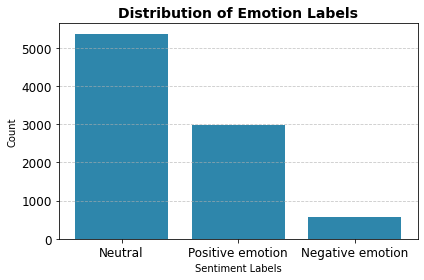

In [24]:
sentiment_counts = df['target'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color="#2E86AB")  
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.title('Distribution of Emotion Labels', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

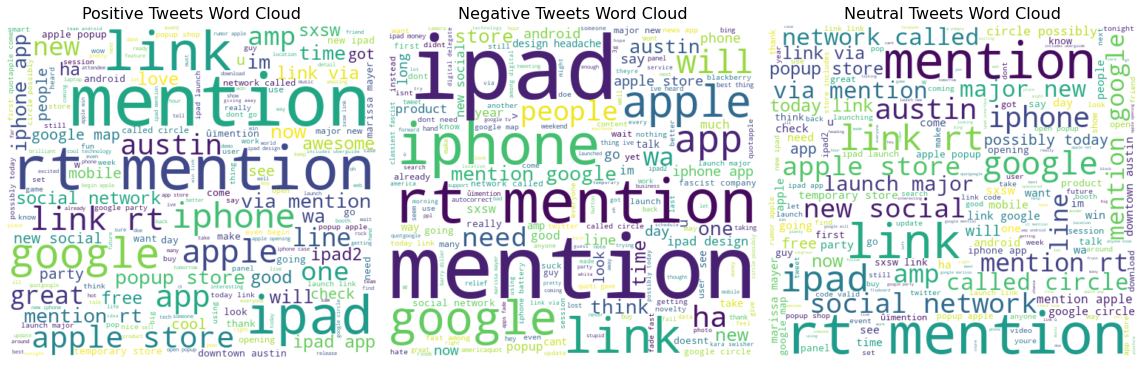

In [25]:
from wordcloud import WordCloud

pos_tweets = df[df['target'] == 'Positive emotion']['lemmatized_tweet']
neg_tweets = df[df['target'] == 'Negative emotion']['lemmatized_tweet']
neut_tweets = df[df['target'] == "Neutral"]['lemmatized_tweet']

plt.figure(figsize=(16, 10))

def generate_word_cloud_subplot(tweets, title, position):
    text = ' '.join([' '.join(tweet) if isinstance(tweet, list) else str(tweet) for tweet in tweets if tweet])
    
    wordcloud = WordCloud(
        width=500,
        height=450,
        background_color='white',
        random_state=42,
        font_path=None  
    ).generate(text)
    
    plt.subplot(1, 3, position)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')

generate_word_cloud_subplot(pos_tweets, 'Positive Tweets Word Cloud', 1)
generate_word_cloud_subplot(neg_tweets, 'Negative Tweets Word Cloud', 2)
generate_word_cloud_subplot(neut_tweets, 'Neutral Tweets Word Cloud', 3)

plt.tight_layout()
plt.show()


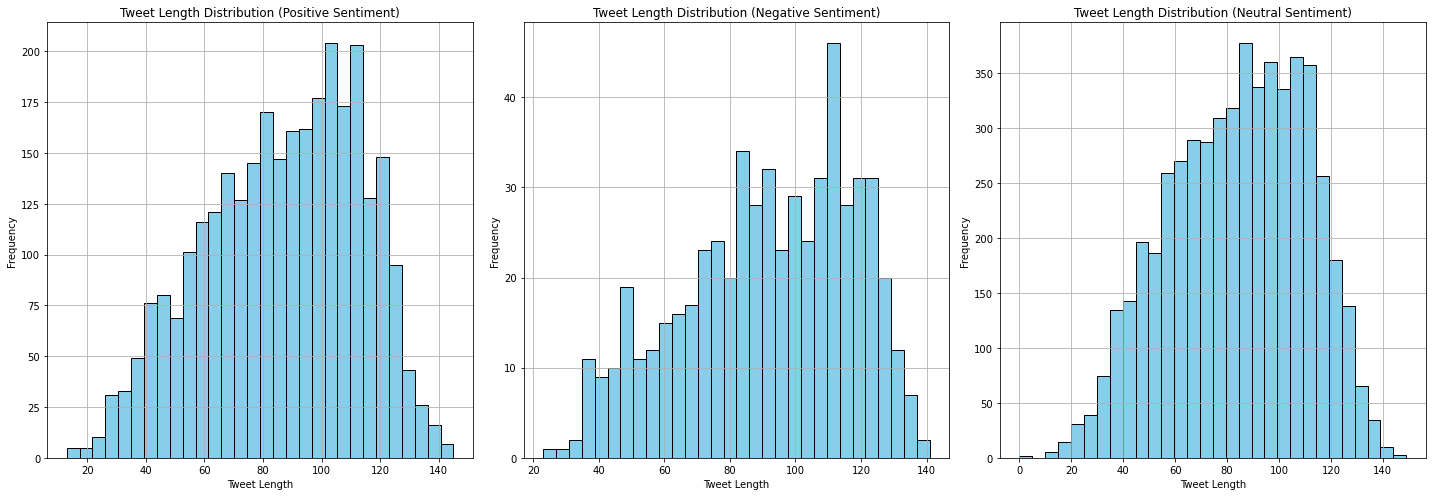

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

def plot_tweet_length_histograms(tweets, sentiment_label, ax):
    tweet_lengths = tweets.str.len()
    
    ax.hist(tweet_lengths, bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel('Tweet Length')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Tweet Length Distribution ({sentiment_label} Sentiment)')
    ax.grid(True)

plot_tweet_length_histograms(pos_tweets, 'Positive', axes[0])
plot_tweet_length_histograms(neg_tweets, 'Negative', axes[1])
plot_tweet_length_histograms(neut_tweets, 'Neutral', axes[2])

plt.subplots_adjust(wspace=0.4)  
plt.tight_layout() 
plt.show()

**Summary**: In this Exploratory Data Analysis (EDA) section, we explored and visualized the distribution of sentiments within our tweet dataset. We began by creating a bar chart showing the number of tweets in each sentiment category (positive, negative, and neutral), providing a clear overview of the general sentiment distribution. Next, we generated word clouds for each sentiment category, highlighting the most frequent and representative terms in positive, negative, and neutral tweets, which helped identify the dominant themes and expressions in each group. Finally, we analyzed the tweet lengths in terms of word counts for each sentiment using histograms, offering additional insights into the structure and density of messages according to the expressed emotions. Overall, these analyses provide both quantitative and qualitative insights into the dataset, establishing a solid foundation for the subsequent modeling steps.

# *3-Modeling*

We start our analysis with a **binary classification task**, focusing on distinguishing between positive and negative emotions. Subsequently, we extend the approach to multiclass classification by including a neutral sentiment category. The workflow is organized as follows:

- Data Splitting: The filtered dataset is divided into training and testing sets using the train_test_split function to ensure proper evaluation of model performance.

- Label Encoding: Textual sentiment labels ('Positive emotion' and 'Negative emotion') are transformed into numerical values (1 for positive and 0 for negative) using LabelEncoder, enabling compatibility with machine learning algorithms.

- TF-IDF Vectorization: Tweets are converted into numerical feature vectors through TF-IDF vectorization. The TfidfVectorizer represents each tweet as a vector capturing the importance of terms relative to the corpus, which is essential for text-based modeling.

- Model Evaluation: Model performance is assessed using accuracy, a detailed classification report (including precision, recall, and F1-score), and a confusion matrix, which provides insight into how well the model distinguishes between sentiment classes.

We implement multiple modeling techniques to improve predictive performance, including Naive Bayes, Support Vector Classification (SVC), and Random Forest, providing a comprehensive approach to sentiment analysis on the dataset.

## **3.1 Baseline Model**

The **Naive Bayes** algorithm is chosen as the baseline model due to its simplicity, computational efficiency, and proven effectiveness in text classification tasks. Its straightforward approach allows for easy interpretation of results, making it an ideal starting point for model development. Furthermore, Naive Bayes delivers a reliable baseline performance, providing an initial estimate of achievable accuracy without relying on complex algorithms. This baseline serves as a reference point, enabling the evaluation of whether more advanced modeling techniques are warranted.

In [27]:
label_encoder = LabelEncoder()

custom_encoding = ['Negative', 'Positive']
label_encoder.fit(custom_encoding)

encoded_classes = label_encoder.classes_

print("Encoded Classes:")
for code, sentiment in enumerate(encoded_classes):
    print(f"Code {code} represents '{sentiment}'")


Encoded Classes:
Code 0 represents 'Negative'
Code 1 represents 'Positive'


In [28]:
filtered_data = df[(df['target'] == 'Positive emotion') | (df['target'] == 'Negative emotion')]

X = filtered_data['lemmatized_tweet']  
y = filtered_data['target']          

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Naive Bayes Accuracy: 0.8403954802259888
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.84      1.00      0.91       595

    accuracy                           0.84       708
   macro avg       0.42      0.50      0.46       708
weighted avg       0.71      0.84      0.77       708

Confusion Matrix:
[[  0 113]
 [  0 595]]


In this section, we implemented a baseline sentiment analysis model using the Naive Bayes algorithm, chosen for its simplicity, computational efficiency, and proven suitability for text classification tasks. We began by encoding the sentiment labels into numerical values, transforming positive and negative emotions into a format compatible with machine learning algorithms. The textual data was then vectorized using TF-IDF, converting the lemmatized tweets into numerical feature vectors. The dataset was split into training and testing sets to evaluate model performance. After training the Multinomial Naive Bayes model, we obtained an accuracy of approximately 84%, with the classification report and confusion matrix providing detailed insights into the model’s predictive capabilities. This baseline establishes a reference point for sentiment classification, offering an initial performance benchmark and guiding the development of more advanced models.

## **3.2 Model Iteration 1- (SVM)**

We move on to Support Vector Machines (SVM) to overcome the limitations identified in the Naive Bayes baseline model. SVMs are well-regarded for their ability to handle imbalanced datasets, which is particularly relevant in our case, where positive tweets significantly outnumber negative ones. Moreover, SVMs provide the potential to improve the recall for the negative sentiment class (class 0) while maintaining high precision and recall for the positive sentiment class (class 1), thereby addressing the baseline model’s challenges in correctly identifying negative sentiments.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

def custom_preprocessor(text):
    return text.lower()

count_vectorizer = CountVectorizer(max_features=5000, preprocessor=custom_preprocessor)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_count, y_train)

y_pred_count = svm_classifier.predict(X_test_count)

accuracy_count = accuracy_score(y_test, y_pred_count)
print("SVM Accuracy with Count Vectors:", accuracy_count)

print("Classification Report with Count Vectors:")
print(classification_report(y_test, y_pred_count))

print("Confusion Matrix with Count Vectors:")
print(confusion_matrix(y_test, y_pred_count))


SVM Accuracy with Count Vectors: 0.8785310734463276
Classification Report with Count Vectors:
              precision    recall  f1-score   support

           0       0.63      0.58      0.60       113
           1       0.92      0.94      0.93       595

    accuracy                           0.88       708
   macro avg       0.78      0.76      0.77       708
weighted avg       0.87      0.88      0.88       708

Confusion Matrix with Count Vectors:
[[ 65  48]
 [ 38 557]]


In this stage, we implemented the first model iteration using Support Vector Machines (SVM) to address the shortcomings observed in the Naive Bayes baseline. SVM was selected for its robustness in handling imbalanced datasets, which is particularly relevant given the predominance of positive tweets in our dataset. The textual data was vectorized using a Count Vectorizer with a custom preprocessing function to normalize text. After training the linear SVM classifier, the model achieved an accuracy of approximately 87.85%, with a notable improvement in recall for the negative sentiment class compared to the baseline model. The classification report and confusion matrix further highlighted the model’s enhanced ability to correctly identify both positive and negative sentiments, demonstrating a significant performance gain and validating the SVM approach as a more effective solution for binary sentiment classification.

## **3.3 Model Iteration 2- (Random Forest)**

To further enhance model accuracy and address the challenges associated with correctly identifying negative sentiment instances (class 0), we turn to the Random Forest classifier for the next iteration. Random Forests are well-regarded for their ability to manage imbalanced datasets and their strong performance in text classification tasks. They are particularly effective at capturing complex patterns and interactions within the data, which can improve the correct classification of negative tweets. Moreover, Random Forests provide flexibility through hyperparameter tuning, such as adjusting the number of estimators or the maximum tree depth, enabling optimization of model performance. This approach, combined with careful parameter adjustment, has the potential to deliver enhanced accuracy and robust performance across both negative (class 0) and positive (class 1) sentiment categories.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

n_estimators = 100 
random_forest_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

y_pred = random_forest_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.8884180790960452
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.32      0.48       113
           1       0.89      1.00      0.94       595

    accuracy                           0.89       708
   macro avg       0.92      0.66      0.71       708
weighted avg       0.90      0.89      0.86       708

Confusion Matrix:
[[ 36  77]
 [  2 593]]


In this iteration, we employed the Random Forest classifier to improve the model’s performance, particularly in addressing the challenges of correctly identifying negative sentiment tweets (class 0). Random Forests are highly effective for handling imbalanced datasets and capturing complex relationships within textual data, which enhances their ability to classify tweets accurately. By leveraging TF-IDF vectorization for feature representation and tuning key hyperparameters, such as the number of estimators, we optimized the model’s performance. The Random Forest model achieved an overall accuracy of approximately 88.8%, demonstrating strong classification capability for positive sentiment (class 1) while partially improving recognition of negative sentiment (class 0). This approach provides a robust framework for sentiment classification, offering clear improvements over simpler baseline models and establishing a foundation for potential further refinements.

** **

In this section, we extend our analysis to **multiclass classification**, incorporating three distinct sentiment categories: positive, negative, and neutral. The overall methodology follows the framework established for binary classification, with appropriate adjustments to handle the additional sentiment class. This includes preparing the dataset, encoding labels, vectorizing textual data, and applying machine learning models capable of distinguishing among all three sentiment categories, ensuring comprehensive evaluation of model performance across multiple classes.

## **3.4 Baseline Model (Naive Bayes with Hyperparameter Tuning Using GridSearchCV)**

In [31]:
label_encoder = LabelEncoder()
df['emotion_encoded'] = label_encoder.fit_transform(df['target'])
encoded_classes = label_encoder.classes_

print("Encoded Sentiment Values:")
for code, sentiment in enumerate(encoded_classes):
    print(f"Code {code} represents '{sentiment}'")


Encoded Sentiment Values:
Code 0 represents 'Negative emotion'
Code 1 represents 'Neutral'
Code 2 represents 'Positive emotion'


In [32]:
X = df['lemmatized_tweet']  
y = df['target']          
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

naive_bayes = MultinomialNB()

param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],  
    'fit_prior': [True, False] 
}

grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_tfidf, y_train)

best_alpha = grid_search.best_params_['alpha']
best_fit_prior = grid_search.best_params_['fit_prior']

print("Best Alpha:", best_alpha)
print("Best Fit Prior:", best_fit_prior)

best_naive_bayes = MultinomialNB(alpha=best_alpha, fit_prior=best_fit_prior)
best_naive_bayes.fit(X_train_tfidf, y_train)

y_pred = best_naive_bayes.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Tuned Multinomial Naive Bayes Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Alpha: 0.5
Best Fit Prior: True
Tuned Multinomial Naive Bayes Accuracy: 0.6638608305274972
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.02      0.05       123
           1       0.67      0.91      0.77      1069
           2       0.65      0.34      0.45       590

    accuracy                           0.66      1782
   macro avg       0.69      0.43      0.42      1782
weighted avg       0.67      0.66      0.61      1782

Confusion Matrix:
[[  3  99  21]
 [  1 978  90]
 [  0 388 202]]


In this phase, we implemented a multiclass classification model using the Multinomial Naive Bayes algorithm, enhanced through hyperparameter tuning with GridSearchCV. The sentiment labels were first encoded into numerical values, representing negative, neutral, and positive sentiments. The textual data was vectorized using TF-IDF, transforming the tweets into numerical features suitable for model training. A grid search was then conducted over key hyperparameters, specifically alpha and fit_prior, to identify the optimal configuration for the classifier. The best parameters (alpha = 0.5 and fit_prior = True) were applied to train the final tuned model. Evaluation on the test set revealed an overall accuracy of 66%, with a detailed classification report and confusion matrix highlighting the model’s strengths in identifying neutral sentiments and its relative difficulty in correctly classifying negative and positive tweets. This approach provides a robust baseline for multiclass sentiment analysis, offering a foundation for comparison with more advanced models in subsequent iterations.

## **3.4 Model iteration 1: (Random Forest)**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

n_estimators = 100 
random_forest_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

random_forest_classifier.fit(X_train_tfidf, y_train)

y_pred = random_forest_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Random Forest Accuracy: 0.6840628507295174
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.17      0.28       123
           1       0.69      0.91      0.78      1069
           2       0.67      0.39      0.49       590

    accuracy                           0.68      1782
   macro avg       0.69      0.49      0.52      1782
weighted avg       0.68      0.68      0.65      1782

Confusion Matrix:
[[ 21  84  18]
 [  6 970  93]
 [  2 360 228]]


In this iteration, we applied a Random Forest classifier to the multiclass sentiment analysis task, leveraging TF-IDF vectorization to convert textual data into numerical features. The model was trained with 100 estimators and evaluated on the test set. The Random Forest achieved an overall accuracy of 68%, demonstrating strong performance in identifying neutral sentiments, while facing challenges with negative sentiment classification. The detailed classification report and confusion matrix indicate that the model effectively captures the majority class (neutral tweets) and shows moderate performance for positive tweets, yet struggles with minority class instances (negative tweets). This iteration highlights the Random Forest’s robustness and ability to model complex patterns, providing a solid baseline for further model improvements and hyperparameter tuning in subsequent analyses.

## **3.5 Model iteration 2: (Logistic Regression)**

In [34]:
X = df['lemmatized_tweet']  
y = df['target']          

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

logistic_regression = LogisticRegression(max_iter=5000)
logistic_regression.fit(X_train_tfidf, y_train)

y_pred = logistic_regression.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.691358024691358
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.11      0.20       123
           1       0.70      0.88      0.78      1069
           2       0.65      0.47      0.54       590

    accuracy                           0.69      1782
   macro avg       0.71      0.49      0.51      1782
weighted avg       0.69      0.69      0.66      1782

Confusion Matrix:
[[ 14  80  29]
 [  4 943 122]
 [  0 315 275]]


In this phase, we implemented Logistic Regression as the second model for multiclass sentiment classification. After encoding the sentiment labels and transforming the tweets into TF-IDF vectors, the model was trained on the training set and evaluated on the test set. Logistic Regression achieved an overall accuracy of 69%, showing a moderate improvement compared to the tuned Naive Bayes model. Class-wise metrics indicate that the model effectively identifies neutral and positive sentiment tweets but continues to face challenges in correctly detecting negative sentiment tweets, which aligns with the class imbalance in the dataset. Despite this limitation, the model provides a solid foundation for understanding linear separability among classes and serves as a reference point for further tuning or the development of more complex models.

# *4-Evaluation*

In the context of binary sentiment analysis, the Random Forest model demonstrated superior performance, achieving an accuracy of 88.84% while maintaining balanced precision and recall across both positive and negative sentiments. For multiclass sentiment analysis, the Logistic Regression model proved most effective, reaching an accuracy of 69.1% and showing a relatively balanced performance across all sentiment categories.

Our analysis of Twitter discussions regarding Apple and Google products highlighted several key factors influencing public sentiment, including the prevalence of positive and negative terms, the presence of specific keywords, and overall mention volume. These insights can be highly valuable for stakeholders, such as Apple, market analysts, and investors, enabling them to evaluate marketing strategies, anticipate stock performance, and make informed decisions.

Moreover, consumers can leverage these findings to better understand public opinion and make more informed purchasing choices. Overall, this sentiment analysis provides a data-driven framework that supports strategic decision-making for both businesses and individuals in the technology market.

# **5-Business Recommendation 1**

**Highlight and Promote Positively Perceived Product Features**

Positive tweets reveal the features and aspects of products that excite consumers. Apple and Google can leverage these insights by emphasizing these strengths in targeted marketing campaigns and social media posts, enhancing positive perception and driving product adoption.

# **6-Business Recommendation 2**

**Monitor and Respond Quickly to Negative Feedback**

Although negative sentiments are less frequent, they are often focused on specific product issues. Companies should implement social listening systems to quickly identify recurring problems and respond proactively, whether through product improvements or personalized user engagement, to mitigate negative impact on brand reputation.

# **7-Business Recommendation 3**

**Align Product and Marketing Strategies with Sentiment Trends**

Sentiment trends reveal consumer expectations and preferences. Integrating these insights into product development and marketing strategies allows Apple and Google to better align offerings with market needs. Features generating positive sentiment can be highlighted in future releases, while sources of dissatisfaction can be addressed or repositioned.

# **8-Conclusion**

This project demonstrates the application of advanced Natural Language Processing (NLP) techniques to perform sentiment analysis on Twitter data related to Apple and Google products. Through a structured pipeline encompassing data preprocessing, exploratory data analysis (EDA), feature extraction via TF-IDF vectorization, and iterative modeling with Naive Bayes, Support Vector Machines, Random Forest, and Logistic Regression, we systematically evaluated both binary and multiclass sentiment classification tasks.

The analysis highlights the strengths and limitations of each modeling approach. Random Forest provided superior performance in binary classification, effectively handling imbalanced datasets and capturing complex patterns associated with negative sentiment tweets. Logistic Regression emerged as the most effective approach for multiclass classification, achieving balanced precision and recall across negative, neutral, and positive sentiments.

Furthermore, the study offers actionable insights for stakeholders. By examining sentiment trends, key influencing factors, and public opinion patterns, companies can enhance marketing strategies, improve product development, and engage consumers more effectively. The methodologies employed, including hyperparameter tuning, rigorous model evaluation, and confusion matrix analysis, ensure robustness, reproducibility, and data-driven decision-making.

Overall, this work not only validates the utility of machine learning and NLP in understanding consumer sentiment but also establishes a scalable framework for future analyses of social media data in product performance evaluation and strategic business intelligence.

# **9-Next Steps**

Future work will focus on enhancing the sentiment analysis framework and expanding its practical applications. Specifically:

- **Model Deployment**: Integrate the best-performing model into a real-time social media monitoring system to track public sentiment on Apple and Google products dynamically.

- **Continuous Learning**: Regularly retrain the models with new Twitter data to adapt to evolving language trends, emerging topics, and shifting public opinions, ensuring the system remains accurate and relevant.

- **Feature Expansion**: Explore additional data features such as tweet metadata, user engagement metrics, hashtags, and temporal trends to improve predictive performance and capture nuanced sentiment patterns.

- **Business Intelligence Integration**: Develop interactive dashboards to visualize sentiment trends, highlight emerging consumer concerns, and provide actionable insights for marketing strategies, product development, and investor decision-making.

- **Multilingual & Cross-Platform Extension**: Consider expanding the analysis to other social media platforms and multiple languages to broaden market insights and understand global consumer sentiment comprehensively.